# Compare Oxygen in 2 bathy (v202108 & v202310): cross sections

In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools, places, visualisations


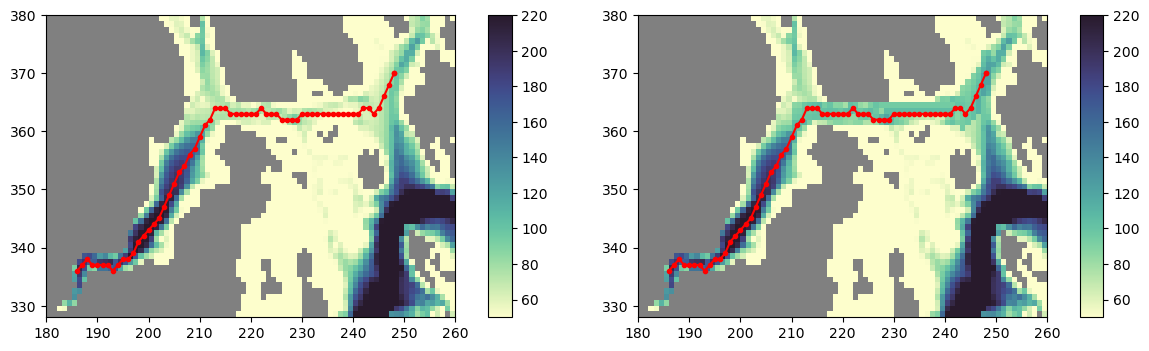

In [2]:
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable
thalweg = np.loadtxt('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt', delimiter=' ', dtype=int)
grid = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
grid2 = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')
bathy = grid.variables['Bathymetry'][:,:]
bathy2 = grid2.variables['Bathymetry'][:,:]
lats = grid.variables['nav_lat'][:,:]
lons = grid.variables['nav_lon'][:,:]
lone = lons[thalweg[:,0],thalweg[:,1]];
late = lats[thalweg[:,0],thalweg[:,1]];
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathy, cmap=mycmap, vmin=50, vmax=220)
ax[0].plot(thalweg[:,1],thalweg[:,0],marker='.',color='r')
im2 = ax[1].pcolormesh(bathy2, cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg[:,1],thalweg[:,0],marker='.',color='r')
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
ax[0].set_xlim([180, 260])
ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')

In [3]:
#open bathy file and meshmask
oldgridT = nc.Dataset('/results2/SalishSea/nowcast-green.202111/12aug19/SalishSea_1h_20190812_20190812_grid_T.nc')
oldgridU = nc.Dataset('/results2/SalishSea/nowcast-green.202111/12aug19/SalishSea_1h_20190812_20190812_grid_U.nc')
oldgridV = nc.Dataset('/results2/SalishSea/nowcast-green.202111/12aug19/SalishSea_1h_20190812_20190812_grid_V.nc')
oldchem = nc.Dataset('/results2/SalishSea/nowcast-green.202111/12aug19/SalishSea_1h_20190812_20190812_chem_T.nc')
oldfbathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')
oldfmesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')

newgridT = nc.Dataset('/ocean/atall/MOAD/Model/runs/12aug19/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_grid_T.nc')
newgridU = nc.Dataset('/ocean/atall/MOAD/Model/runs/12aug19/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_grid_U.nc')
newgridV = nc.Dataset('/ocean/atall/MOAD/Model/runs/12aug19/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_grid_V.nc')
newchem = nc.Dataset('/ocean/atall/MOAD/Model/runs/12aug19/12aug19_bathy202310b/SalishSea_1h_20190812_20190812_chem_T.nc')
newfbathy = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')
newfmesh = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')

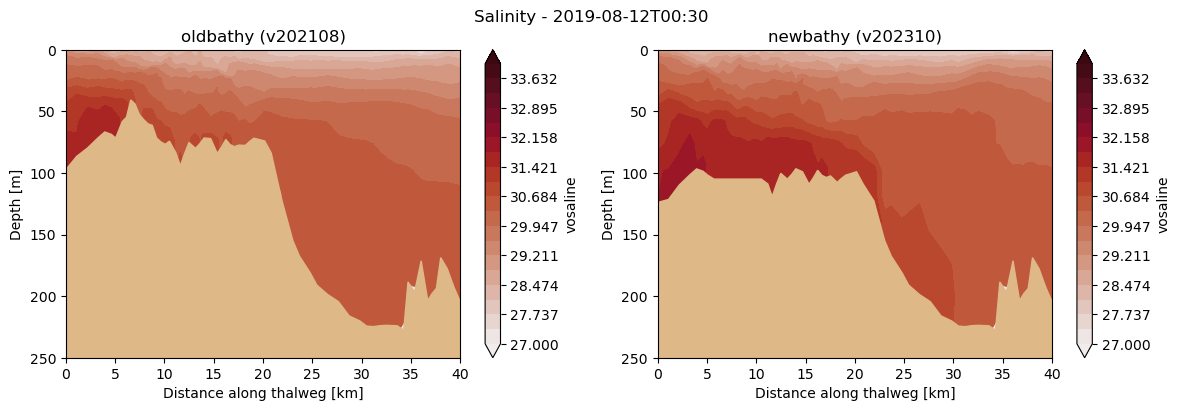

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
modvar='vosaline'
level = np.linspace(27,34,20)
oldcb=visualisations.contour_thalweg(ax[0],oldgridT.variables[modvar][0,...],oldfbathy,oldfmesh,clevels=level,cmap=cm.amp,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[0].set_ylim([250, 0])
ax[0].set_title('oldbathy (v202108)')
newcb=visualisations.contour_thalweg(ax[1],newgridT.variables[modvar][0,...],newfbathy,newfmesh,clevels=level,cmap=cm.amp,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[1].set_ylim([250, 0])
ax[1].set_title('newbathy (v202310)')
fig.suptitle('Salinity - 2019-08-12T00:30');

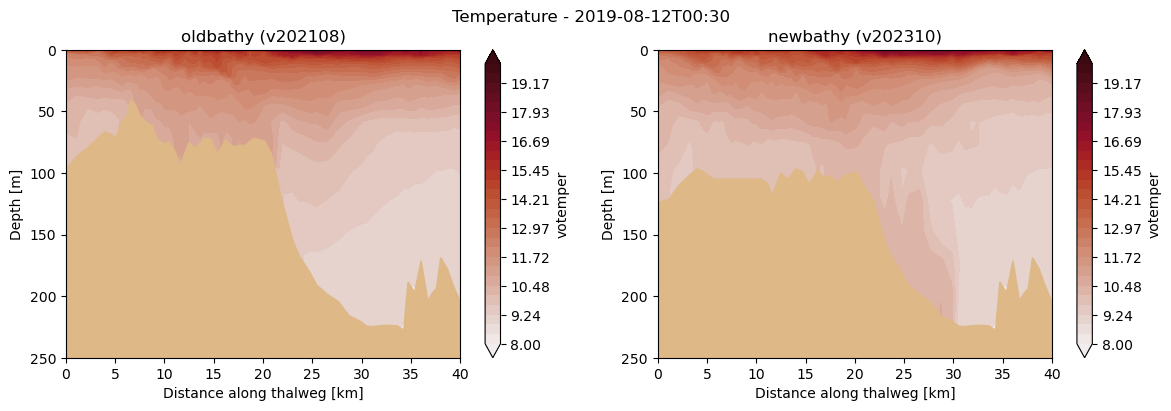

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
modvar='votemper'
level = np.linspace(8,20,30)
oldcb=visualisations.contour_thalweg(ax[0],oldgridT.variables[modvar][0,...],oldfbathy,oldfmesh,clevels=level,cmap=cm.amp,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[0].set_ylim([250, 0])
ax[0].set_title('oldbathy (v202108)')
newcb=visualisations.contour_thalweg(ax[1],newgridT.variables[modvar][0,...],newfbathy,newfmesh,clevels=level,cmap=cm.amp,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[1].set_ylim([250, 0])
ax[1].set_title('newbathy (v202310)')
fig.suptitle('Temperature - 2019-08-12T00:30');

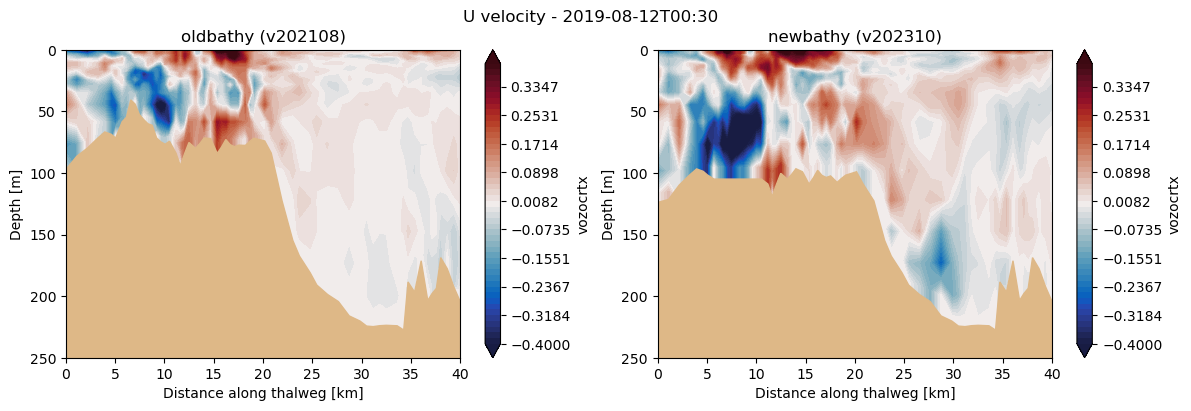

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
modvar='vozocrtx'
level = np.linspace(-0.4,0.4,50)
oldcb=visualisations.contour_thalweg(ax[0],oldgridU.variables[modvar][0,...],oldfbathy,oldfmesh,clevels=level,cmap=cm.balance,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[0].set_ylim([250, 0])
ax[0].set_title('oldbathy (v202108)')
newcb=visualisations.contour_thalweg(ax[1],newgridU.variables[modvar][0,...],newfbathy,newfmesh,clevels=level,cmap=cm.balance,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[1].set_ylim([250, 0])
ax[1].set_title('newbathy (v202310)')
fig.suptitle('U velocity - 2019-08-12T00:30');

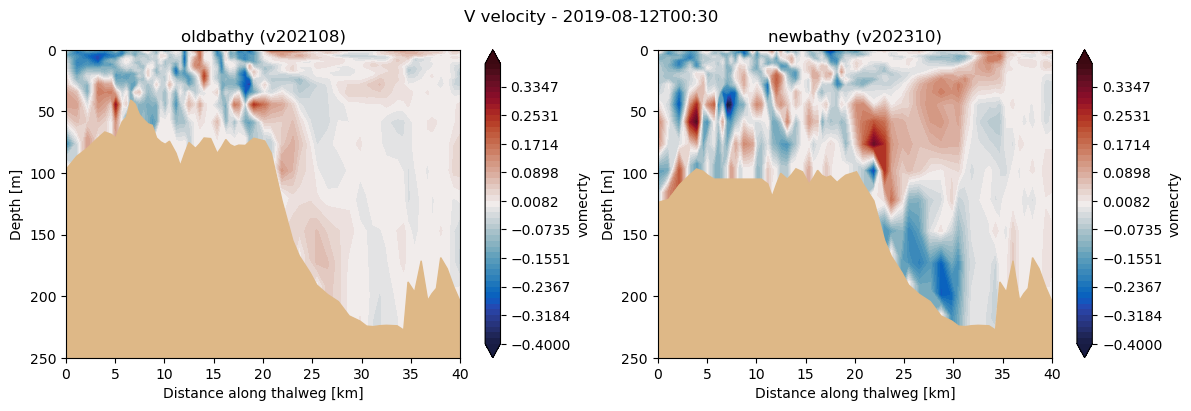

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
modvar='vomecrty'
level = np.linspace(-0.4,0.4,50)
oldcb=visualisations.contour_thalweg(ax[0],oldgridV.variables[modvar][0,...],oldfbathy,oldfmesh,clevels=level,cmap=cm.balance,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[0].set_ylim([250, 0])
ax[0].set_title('oldbathy (v202108)')
newcb=visualisations.contour_thalweg(ax[1],newgridV.variables[modvar][0,...],newfbathy,newfmesh,clevels=level,cmap=cm.balance,thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[1].set_ylim([250, 0])
ax[1].set_title('newbathy (v202310)')
fig.suptitle('V velocity - 2019-08-12T00:30');

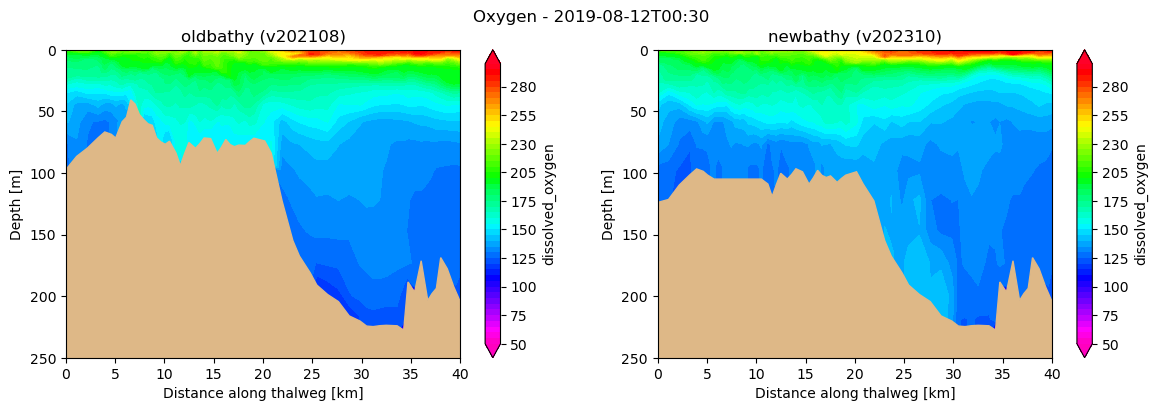

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
modvar='dissolved_oxygen'
level = np.linspace(80,300,30)
oldcb=visualisations.contour_thalweg(ax[0],oldchem.variables[modvar][0,...],oldfbathy,oldfmesh,clevels='oxygen',cmap='gist_rainbow_r',thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[0].set_ylim([250, 0])
ax[0].set_title('oldbathy (v202108)')
newcb=visualisations.contour_thalweg(ax[1],newchem.variables[modvar][0,...],newfbathy,newfmesh,clevels='oxygen',cmap='gist_rainbow_r',thalweg_file='/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt',
                                  cbar_args={'label':modvar})
ax[1].set_ylim([250, 0])
ax[1].set_title('newbathy (v202310)')
fig.suptitle('Oxygen - 2019-08-12T00:30');